<img src="https://docs.google.com/uc?export=download&id=1EiHSYfHYk8nKMEWd6A74CMFVak5Lf4ab">
# Recommender Systems: Content-based filtering

>[Recommender Systems: Content-based filtering](#scrollTo=b9q-VxEW5tRs)

>[1- Introduction](#scrollTo=1oBho425Q7ca)

>>[Concept](#scrollTo=yLvtrsm0RcWq)

>>[Process](#scrollTo=A8DvRRWlRdGi)

>>[Learning User Profiles](#scrollTo=OjzIaOe1RdZ2)

>[2- Content Based Filtering with Decision Trees](#scrollTo=VL49qQMiRCfC)

>>[Concept](#scrollTo=QtI6YjSJRzo8)

>>[Items Description](#scrollTo=Tg2exEipRz7w)

>>[The labels](#scrollTo=lYnbKQUdR0Ou)

>[3- User profiles Learning with Decision Trees](#scrollTo=Nhm8OJc_RFU8)

>>[Data preparation](#scrollTo=TOgMnI_CR7QE)

>>[Extracting Features](#scrollTo=iJCObGCDR7Wk)

>>[Learning the User’s Profile](#scrollTo=Zd06of0ZR7JC)

>[4- Make predictions with the decision tree](#scrollTo=Ca8Ofrs7RHwC)

>>[Not rated movies](#scrollTo=xn8bZSmqSBwY)

>>[Make predictions](#scrollTo=157T7zEfSB_u)

>[5- Nearest Neighboor Method](#scrollTo=5aXVjrUrRNGi)

>>[Concept](#scrollTo=H71qigLHSGU2)

>>[Compute similarities](#scrollTo=yMgLDZAdSGjG)

>>[Make predictions](#scrollTo=Z7prBx0pSGbS)

>[References](#scrollTo=tSbN2yDrRSdW)



# 1- Introduction


## Concept


* As said in [Francesco et al., 2011], **Content Based**recommendation systems try to recommend items **similar** to those a given user has liked in the past.

* The recommendation for an **item** to a **user** is based on the **actual features** that **this item** has. And, on actual feedback and reviews that **this user** has already done. 

* The system is build around **3** components:

  * **The item description**: each item is described by a set of attributes (features)

  * **The user profile**: each user is  described by a model generated from the features of the items rated by that user

  * **A matching strategy**: how to match up the user’s profile attributes with an item attributes

## Process
* There are **3** major steps in building a **content-based** recommender system:
  * Analyze content:  We preprocess the data to construct a **structured items description**
  * Learn users profiles:  We use the users **preferences** for **items** to construct a user profile
  * Build a filtering component: We use the user profile to **recommend new items** by **matching**  the representation of the user’s profile with the representation of the new items. **Feedback** of the user on these recommendations are used to **enhance** the user profile.

## Learning User Profiles

* Different approaches exist to construct a user profile. They are based on techniques of **text classification**:

  * **Probabilistic methods and Naive Bayes**: a probabilistic text classification approach based on the Naive Bayesian Classifier
(see Week4 lesson 3 for more details)

  * ** Rocchio’s algorithm**: is a relevant feedback algorithm. It refines the recommendations by using the feedback of users on these recommendation. The update process takes into account relevant and non relevant recommended items.

  * **Decision Trees Classifier** (see Week5 lesson 1)

  * **Nearest neighbors algorithm** (this week, lesson 1)

  * **Linear Classifiers** (week 4 lessons)

# 2- Content Based Filtering with Decision Trees



## Concept

* Each user profile will be represented by a **Decision Tree Classifier**. The tree will learn from the description of **items** he already reviewed.
* The **labels** will be the **ratings** (or **like** and **dislike**) the **user** had given to these items.

* The resulting Tree will later used to:
  *  predict the review (rating) of a new item.
  * make a list of recommendations to that user based on the predictions on a list of items.

 ## Items Description
 
 * In general, the items are described by **text**. So, in order to use them, we have to vectorize our text data. (See week 4 lesson1)
 
 * We will built a movie recommender for **one** user, using the data available at [The Movies Dataset | Kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset)

In [0]:
!rm -R AAA-Ped-Week7
!git clone https://github.com/MostaSchoolOfAI/AAA-Ped-Week7.git

Cloning into 'AAA-Ped-Week7'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 1), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [0]:
!ls AAA-Ped-Week7/

A3P-w6-ratings.json	    A3P-w7-ratings_small.csv
A3P-w7-movies_metadata.csv  README.md


In [0]:
import pandas as pd
from pandas import DataFrame as DF

myDF = pd.read_csv("AAA-Ped-Week7/A3P-w7-movies_metadata.csv")
print(myDF.shape)
myDF.head(1)

(45466, 24)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [0]:
myDF.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## The labels

* We will use the **ratings** that users gave to these movies as labels.

* We will select only the ratings made by the user with the **id_user = 2**


In [0]:
import numpy as np
myDFR = pd.read_csv("AAA-Ped-Week7/A3P-w7-ratings_small.csv")
print(myDFR.shape)
myDFR.head(1)


(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144


In [0]:
myDFR.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [0]:
myDFU1= myDFR[myDFR["userId"] == 2]
print("The user 1 rated: ",myDFU1.shape[0]," movies")
myDFU1.head(2)

The user 1 rated:  76  movies


,userId,movieId,rating,timestamp
20,2,10,4.0,835355493
21,2,17,5.0,835355681


# 3- User profiles Learning with Decision Trees

## Data preparation

* In this phase  we will merge the ratings done by the user **2** with the description of the movies he rated. (More details about **merging** operations are available in week 3 lesson 1)

In [0]:
# hide wrnings 
import warnings
warnings.filterwarnings('ignore')

In [0]:
# First we have to convert the movieId in the user
# dataframe into string
def myMap(x):
  return str(x)
myDFU1.loc[:,"strId"]=myDFU1.loc[:,"movieId"].apply(myMap)
myDFU1.head(3)

,userId,movieId,rating,timestamp,strId
20,2,10,4.0,835355493,10
21,2,17,5.0,835355681,17
22,2,39,5.0,835355604,39


In [0]:
# merge the 2 dataframes, keep only the rows corresponding to movies id
# that are in both frames
mergedDF = pd.merge(myDFU1,myDF,left_on="strId",right_on="id",how="inner")

print(mergedDF.shape)
mergedDF.head(1)

(58, 29)


,userId,movieId,rating,timestamp,strId,adult,belongs_to_collection,budget,genres,homepage,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,2,17,5.0,835355681,17,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.whatisannwyn.co.uk/,...,2006-01-26,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One of the living for one of the dead.,The Dark,False,5.6,76.0


## Extracting Features

In [0]:
# now we will selcet only the columns of the attributes
# that we are intrested in
myDataF = mergedDF[["overview","rating"]]
myDataF.head(1)

,overview,rating
0,Adèle and her daughter Sarah are traveling on ...,5.0


In [0]:
# Features extractions
from sklearn.feature_extraction.text import TfidfVectorizer
myVectorizer = TfidfVectorizer()
myX = myVectorizer.fit_transform(myDataF["overview"])
print("The size of the features matrix is ",myX.shape)
#the lables for learning
myY= myDataF.rating.values

DFX =DF(myX.toarray(),columns= myVectorizer.get_feature_names())
DFX.head(0)


The size of the features matrix is  (58, 1267)


,10,1000,150,1927,1955,1970,1973,1980,1985,2000,...,worn,writer,yearnings,years,yet,york,you,young,zampano,zealand


## Learning the User’s Profile


In [0]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import cross_validate as c_v

myDTC = DTC(max_depth=3)
scores= c_v(myDTC,myX,myY,cv=3, scoring=["neg_mean_absolute_error"])
print("the mean of MAE of the test folds: ",np.abs(scores["test_neg_mean_absolute_error"]).mean())

the mean of MAE of the test folds:  0.9092592592592593


In [0]:
#fit the model
myDTC.fit(myX,myY)
myDTC.classes_

array([1., 2., 3., 4., 5.])

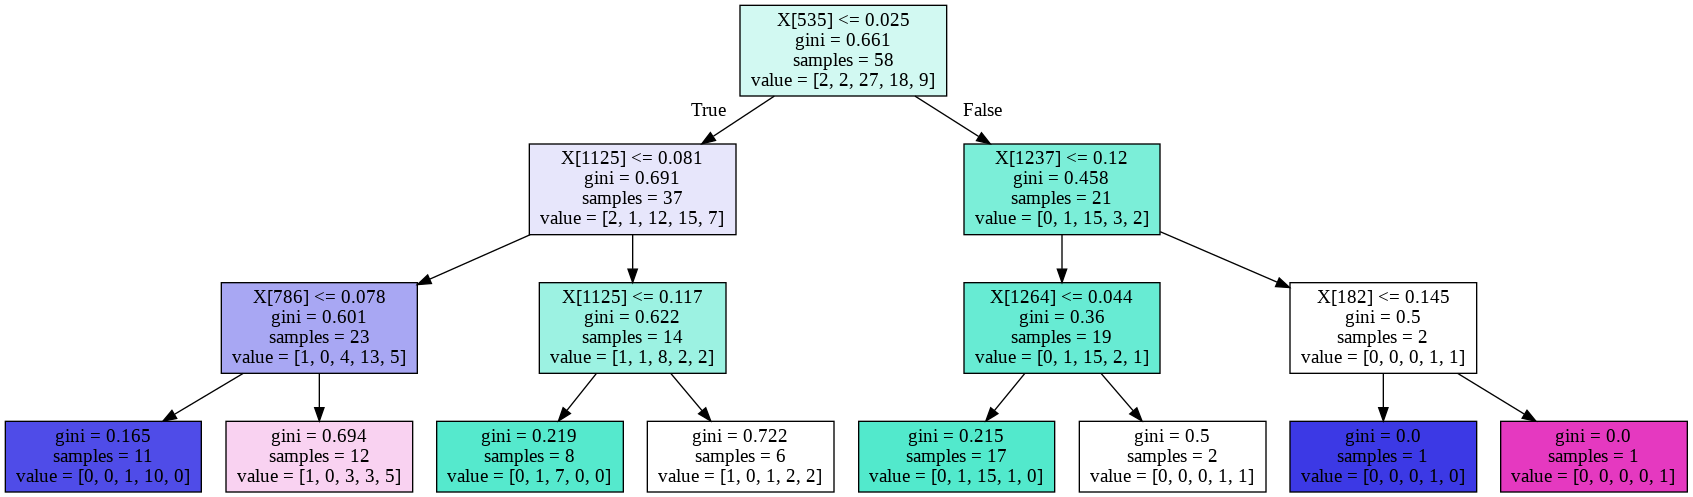

In [0]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image, display
export_graphviz(myDTC,out_file="myTree.dot",filled=True)
with open("myTree.dot") as f:
  myFile = f.read()
myGraph = graphviz.Source(myFile,format="png")
display(Image(myGraph.render()))

# 4- Make predictions with the decision tree

## Not rated movies

* We have to create the list of the movies that the user **2** didn't rate. Then we will selct only **30** movies.
* We have also to select only the features represented in the user's profile.

In [0]:
#All movies
allMov = myDF.id.values
# Movies rated by 2
By2  = myDFU1.strId.values
# Movies not rated by 2
notBy2 = [i for i in allMov if i not in By2]
DFnotB2 = DF(notBy2,columns=["idNB2"])
# description of movies not rated by 2
myDFnotB2 = pd.merge(DFnotB2,myDF,left_on="idNB2",right_on="id",how="inner")


In [0]:
# select the attribute
myFinalDF = myDFnotB2["overview"]
# drop nan values
myFinalDF.dropna(inplace=True)
#extract the features, for only 30 movies
myX2 = myVectorizer.fit_transform(myFinalDF.values)
DFX2 = DF(myX2[:30,:].toarray(), columns= myVectorizer.get_feature_names())


In [0]:
from pandas import DataFrame as DF
myNewDFX = DF()

# The dataframe must contain only the user's profile columns
for i in DFX.columns:
  if i in DFX2.columns:
    myNewDFX[i]=DFX2[i]
  else:
    myNewDFX[i]=0

myNewDFX.head(1)

,10,1000,150,1927,1955,1970,1973,1980,1985,2000,...,worn,writer,yearnings,years,yet,york,you,young,zampano,zealand
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


## Make predictions

* We will make predictions for the first **30** movies in **myX2**. Then, we will sort these predictions, and select the **10 first ratings** 

In [0]:
# predict the class of the ratings
myPredictions= myDTC.predict(myNewDFX)
# sort the predictions by descending order
indSort = np.argsort(myPredictions)[::-1]
# print the 10 biggest scores 
print("The 10 biggest ratings:")
for i in range(10):
  j= indSort[i]
  
  print(i+1,"- ",myDFnotB2.iloc[j,21]," (",myPredictions[j],")")


The 10 biggest ratings:
1 -  Cutthroat Island  ( 5.0 )
2 -  Ace Ventura: When Nature Calls  ( 5.0 )
3 -  Copycat  ( 4.0 )
4 -  Tom and Huck  ( 4.0 )
5 -  Casino  ( 4.0 )
6 -  Sense and Sensibility  ( 4.0 )
7 -  Four Rooms  ( 4.0 )
8 -  Heat  ( 4.0 )
9 -  Powder  ( 4.0 )
10 -  Grumpier Old Men  ( 4.0 )


In [0]:
myDFnotB2.columns

Index(['idNB2', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

# 5- Nearest Neighboor Method

## Concept


* After preparing the descriptions of the items rated by one user. And in order to predict a review on a new item (by that user):

  * Compute the **similarity** between the new item and all the rated item

  * Select the **nearest** or the **k nearest neighbors** items using the computed similarities

  * aggregate the ratings of the selected items.

* In the case of vectorized text attributes, the **cosine similarity measure** could be used.

## Compute similarities
* We will select one item from the not rated items (of the previous section), then we will compute its **cosine similarities** with all the movies rated by the user **2**.

In [0]:
# the movie we selected
myDFnotB2.iloc[13,21]

'Nixon'

In [0]:
# compute the similarities
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(myNewDFX.iloc[13].reshape(1,-1),DFX )
similarities

array([[0.03938174, 0.07689689, 0.06380002, 0.07007084, 0.01557274,
        0.08658868, 0.07756476, 0.09133323, 0.13468837, 0.11750274,
        0.07958574, 0.07407981, 0.11547842, 0.09670878, 0.18569619,
        0.06862389, 0.01040764, 0.12456263, 0.0549071 , 0.0417849 ,
        0.16781957, 0.11108256, 0.11152991, 0.0412832 , 0.14656956,
        0.04338626, 0.05396072, 0.08042772, 0.11006106, 0.05736534,
        0.0993555 , 0.08228833, 0.11171322, 0.0732958 , 0.07650725,
        0.0663284 , 0.07280261, 0.07969508, 0.07012825, 0.06967423,
        0.0456372 , 0.049775  , 0.10144506, 0.02782842, 0.08033655,
        0.08342152, 0.11231549, 0.09330676, 0.06957738, 0.10425088,
        0.19135404, 0.1716252 , 0.08229301, 0.07404372, 0.05771704,
        0.11235331, 0.13343517, 0.06621606]])

## Make predictions



In [0]:
# we will sort the similarities in a descending order
# the select the 10 first neighbors
simOrd = np.argsort(similarities[0])[::-1]

neighbors = myY[simOrd[:10]]
# aggregate the review
print("The predicted rating is: ", np.round(neighbors.mean(),2))

The predicted rating is:  2.9


In [0]:
# the indices in simOrd correspond to the order
# in similarities and in mergedDF 
print("The movies (rated by user2) the most similar to the movie 'Nixon':")

for i in range(10):
  j = simOrd[i]
  print(i+1,"-",mergedDF.iloc[j,25]," (",np.round(similarities[0][j],2),")")

The movies (rated by user2) the most similar to the movie 'Nixon':
1 - Wag the Dog  ( 0.19 )
2 - Stand by Me  ( 0.19 )
3 - Big Fish  ( 0.17 )
4 - Batman Begins  ( 0.17 )
5 - The Science of Sleep  ( 0.15 )
6 - Star Trek IV: The Voyage Home  ( 0.13 )
7 - The Last Samurai  ( 0.13 )
8 - Cat on a Hot Tin Roof  ( 0.12 )
9 - A Clockwork Orange  ( 0.12 )
10 - Rebecca  ( 0.12 )


In [0]:
mergedDF.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'strId', 'adult',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

# References

* [Francesco et al., 2011] Francesco, R., Lior, R., Bracha, S., and Paul B., K., editors (2011). Recommender Systems Handbook. Springer Science+Business Media.

* [Kaggle, ] Kaggle. The movies dataset. https://www.kaggle.com/rounakbanik/the-movies-dataset.

* [Pazzani and Billsus, 2007] Pazzani, M. J. and Billsus, D. (2007). Content-based recommendation systems. In The adaptive web, pages 325–341. Springer

